In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

#### Code 14.1

In [2]:
pancake = np.array([[1,1],[1,0],[0,0]])
# simulate a pancake and return randomly ordered sides
pancakes = np.asarray([np.random.permutation(pancake[np.random.choice(range(3))]) for i in range(10000)])
up = pancakes[:, 0]
down = pancakes[:, 1]
# compute proportion 1/1 (BB) out of all 1/1 and 1/0
num_11_10 = np.sum(up==1)
num_11 = np.sum((up==1) & (down==1))
num_11/num_11_10

0.66807483403741696

#### Code 14.2

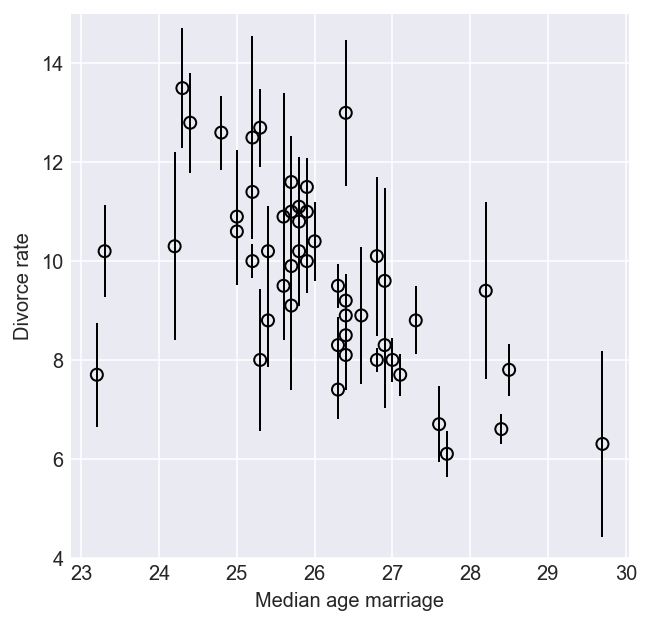

In [3]:
d = pd.read_csv('Data/WaffleDivorce.csv', ';')
# points
_, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(d['MedianAgeMarriage'], d['Divorce'], marker='o', facecolor='none', edgecolors='k', linewidth=1)
# standard errors
ax.errorbar(d['MedianAgeMarriage'], d['Divorce'], d['Divorce SE'].values, ls='none', color='k', linewidth=1)
ax.set_xlabel('Median age marriage')
ax.set_ylabel('Divorce rate')
ax.set_ylim(4, 15);

#### Code 14.3

In [4]:
div_obs = d['Divorce'].values
div_sd = d['Divorce SE'].values
R = d['Marriage'].values
A = d['MedianAgeMarriage'].values
N = len(d)

with pm.Model() as m_14_1:
    sigma = pm.HalfCauchy('sigma', 2.5)
    a = pm.Normal('a', 0., 10.)
    bA = pm.Normal('bA', 0., 10.)
    bR = pm.Normal('bR', 0., 10.)
    mu = a + bA*A + bR*R
    div_est = pm.Normal('div_est', mu, sigma, shape=N)
    obs = pm.Normal('div_obs', div_est, div_sd, observed=div_obs)
    # start value and additional kwarg for NUTS
    start = dict(div_est=div_obs)
    trace_14_1 = pm.sample(4000, tune=1000, njobs=2, 
                           start=start, nuts_kwargs=dict(target_accept=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 96%|█████████▋| 4821/5000 [05:51<00:12, 13.97it/s]/home/osvaldo/Documentos/Proyectos/01_PyMC3/pymc3/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 1 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 5000/5000 [06:03<00:00, 13.76it/s]


#### Code 14.4

In [5]:
pm.summary(trace_14_1, varnames=['div_est', 'a', 'bA', 'bR', 'sigma']).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
div_est__0,11.78,0.69,0.01,10.49,13.17,8000.0,1.0
div_est__1,11.20,1.03,0.01,9.24,13.30,8000.0,1.0
div_est__2,10.47,0.62,0.01,9.33,11.73,8000.0,1.0
div_est__3,12.33,0.86,0.01,10.67,14.06,8000.0,1.0
div_est__4,8.05,0.24,0.00,7.60,8.53,8000.0,1.0
div_est__5,11.01,0.72,0.01,9.58,12.38,8000.0,1.0
div_est__6,7.24,0.64,0.01,5.95,8.45,8000.0,1.0
div_est__7,9.36,0.88,0.01,7.56,10.98,8000.0,1.0
div_est__8,7.01,1.10,0.01,4.90,9.17,8000.0,1.0
div_est__9,8.54,0.30,0.00,7.95,9.14,8000.0,1.0


#### Code 14.5

In [6]:
div_obs = d['Divorce'].values
div_sd = d['Divorce SE'].values
mar_obs = d['Marriage'].values
mar_sd = d['Marriage SE'].values
A = d['MedianAgeMarriage'].values
N = len(d)

with pm.Model() as m_14_2:
    sigma = pm.HalfCauchy('sigma', 2.5)
    a = pm.Normal('a', 0., 10.)
    bA = pm.Normal('bA', 0., 10.)
    bR = pm.Normal('bR', 0., 10.)
    mar_est = pm.Flat('mar_est', shape=N)
    mu = a + bA*A + bR*mar_est
    div_est = pm.Normal('div_est', mu, sigma, shape=N)
    obs1 = pm.Normal('div_obs', div_est, div_sd, observed=div_obs)
    obs2 = pm.Normal('mar_obs', mar_est, mar_sd, observed=mar_obs)
    # start value and additional kwarg for NUTS
    start = dict(div_est=div_obs, mar_est=mar_obs)
    trace_14_2 = pm.sample(4000, tune=1000, njobs=3, 
                           start=start, nuts_kwargs=dict(target_accept=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 95%|█████████▍| 4747/5000 [07:42<00:24, 10.45it/s]/home/osvaldo/Documentos/Proyectos/01_PyMC3/pymc3/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 2 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|█████████▉| 4999/5000 [08:00<00:00, 14.55it/s]/home/osvaldo/Documentos/Proyectos/01_PyMC3/pymc3/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 0 contains 2 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 5000/5000 [08:00<00:00, 10.41it/s]


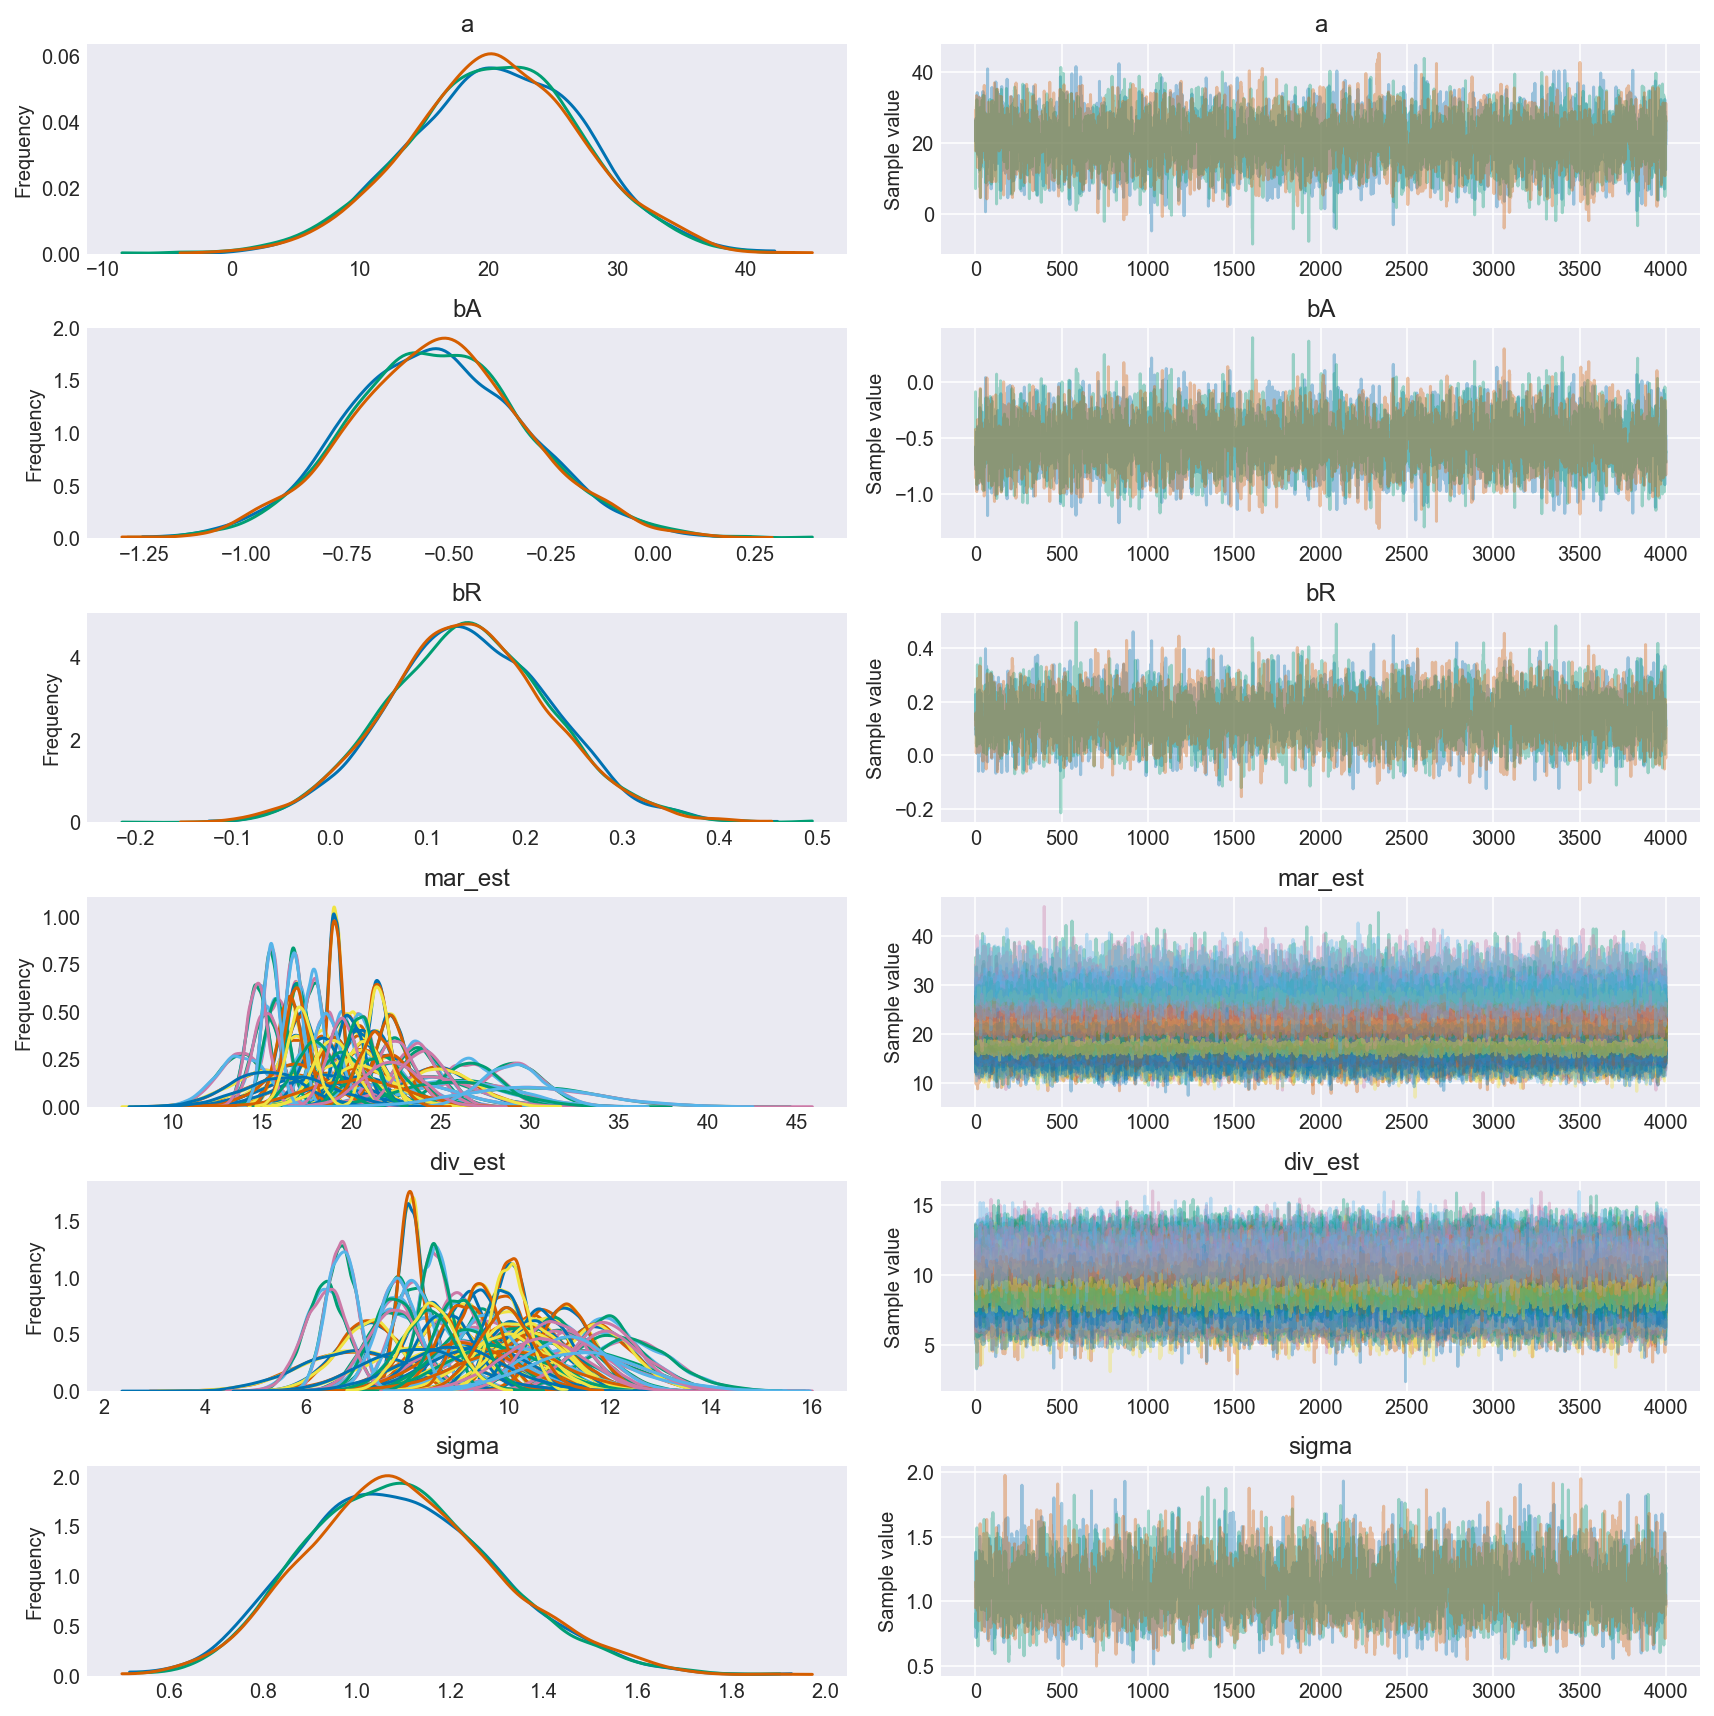

In [7]:
pm.traceplot(trace_14_2);

#### Code 14.6

In [8]:
d = pd.read_csv('Data/milk.csv', ';')
d.loc[:,'neocortex.prop'] = d['neocortex.perc'] / 100
d.loc[:,'logmass'] = np.log(d['mass'])

#### Code 14.7

In [9]:
# prep data
kcal = d['kcal.per.g'].values.copy()
logmass = d['logmass'].values.copy()
# PyMC3 can handle missing value quite naturally.
neocortex = d['neocortex.prop'].values.copy()
mask = np.isfinite(neocortex)
neocortex[~mask] = -999
neocortex = np.ma.masked_values(neocortex, value=-999)

# fit model
with pm.Model() as m_14_3:
    sigma = pm.HalfCauchy('sigma', 1.)
    sigma_N = pm.HalfCauchy('sigma_N', 1.)
    nu = pm.Normal('nu', .5, 1.)
    bN = pm.Normal('bN', 0., 10.)
    bM = pm.Normal('bM', 0., 10.)
    a = pm.Normal('a', 0., 100.)
    neocortex_ = pm.Normal('neocortex', nu, sigma_N, observed=neocortex)
    mu = a + bN*neocortex_ + bM*logmass
    kcal_ = pm.Normal('kcal', mu, sigma, observed=kcal)
    trace_14_3 = pm.sample(5000, tune=5000, njobs=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 96%|█████████▌| 9555/10000 [03:55<00:09, 48.19it/s] /home/osvaldo/Documentos/Proyectos/01_PyMC3/pymc3/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 1 contains 189 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|█████████▉| 9996/10000 [04:04<00:00, 47.86it/s]/home/osvaldo/Documentos/Proyectos/01_PyMC3/pymc3/pymc3/step_methods/hmc/nuts.py:452: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.664707186287, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
/home/osvaldo/Documentos/Proyectos/01_PyMC3/pymc3/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 0 contains 533 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100

#### Code 14.8

In [10]:
# the missing value in pymc3 is automatically model as a node with *_missing as name
pm.summary(trace_14_3, varnames=['neocortex_missing', 
                                 'a', 'bN', 'bM', 'nu', 'sigma_N', 'sigma']).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
neocortex_missing__0,0.63,0.05,0.00,0.53,0.73,3273.0,1.0
neocortex_missing__1,0.62,0.05,0.00,0.52,0.72,1297.0,1.0
neocortex_missing__2,0.62,0.05,0.00,0.53,0.73,1247.0,1.0
neocortex_missing__3,0.65,0.05,0.00,0.56,0.75,6183.0,1.0
neocortex_missing__4,0.70,0.05,0.00,0.61,0.80,3123.0,1.0
neocortex_missing__5,0.66,0.05,0.00,0.56,0.76,2361.0,1.0
neocortex_missing__6,0.69,0.05,0.00,0.60,0.78,5549.0,1.0
neocortex_missing__7,0.70,0.05,0.00,0.60,0.79,4546.0,1.0
neocortex_missing__8,0.71,0.05,0.00,0.62,0.81,3466.0,1.0
neocortex_missing__9,0.65,0.05,0.00,0.55,0.75,5658.0,1.0


#### Code 14.9

In [11]:
# prep data
neocortex = np.copy(d['neocortex.prop'].values)
mask = np.isfinite(neocortex)
kcal = np.copy(d['kcal.per.g'].values[mask])
logmass = np.copy(d['logmass'].values[mask])
neocortex = neocortex[mask]

# fit model
with pm.Model() as m_14_3cc:
    sigma = pm.HalfCauchy('sigma', 1.)
    bN = pm.Normal('bN', 0., 10.)
    bM = pm.Normal('bM', 0., 10.)
    a = pm.Normal('a', 0., 100.)
    mu = a + bN*neocortex + bM*logmass
    kcal_ = pm.Normal('kcal', mu, sigma, observed=kcal)
    trace_14_3cc = pm.sample(5000, tune=5000, njobs=2)

pm.summary(trace_14_3cc, varnames=['a', 'bN', 'bM', 'sigma']).round(2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 98%|█████████▊| 9816/10000 [02:19<00:02, 82.03it/s]/home/osvaldo/Documentos/Proyectos/01_PyMC3/pymc3/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 1 contains 7 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|█████████▉| 9994/10000 [02:21<00:00, 82.69it/s]/home/osvaldo/Documentos/Proyectos/01_PyMC3/pymc3/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 0 contains 17 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 10000/10000 [02:21<00:00, 70.57it/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,-1.06,0.59,0.01,-2.26,0.11,2178.0,1.0
bN,2.75,0.92,0.02,0.93,4.61,2140.0,1.0
bM,-0.10,0.03,0.00,-0.15,-0.04,2620.0,1.0
sigma,0.14,0.03,0.00,0.09,0.20,2620.0,1.0


#### Code 14.10

In [12]:
# prep data
kcal = d['kcal.per.g'].values.copy()
logmass = d['logmass'].values.copy()
neocortex = d['neocortex.prop'].values.copy()
mask = np.isfinite(neocortex)
neocortex[~mask] = -999
neocortex = np.ma.masked_values(neocortex, value=-999)

with pm.Model() as m_14_4:
    sigma = pm.HalfCauchy('sigma', 1.)
    sigma_N = pm.HalfCauchy('sigma_N', 1.)
    a_N = pm.Normal('a_N', .5, 1.)
    betas = pm.Normal('bNbMgM', 0., 10., shape=3) # bN, bM, and gM
    a = pm.Normal('a', 0., 100.)
    
    nu = a_N + betas[2]*logmass
    neocortex_ = pm.Normal('neocortex', nu, sigma_N, observed=neocortex)
    
    mu = a + betas[0]*neocortex_ + betas[1]*logmass
    kcal_ = pm.Normal('kcal', mu, sigma, observed=kcal)
    
    trace_14_4 = pm.sample(5000, tune=5000, njobs=2)

pm.summary(trace_14_4, varnames=['neocortex_missing', 
                                 'a', 'bNbMgM', 'a_N', 'sigma_N', 'sigma']).round(2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 9994/10000 [04:11<00:00, 53.63it/s] /home/osvaldo/Documentos/Proyectos/01_PyMC3/pymc3/pymc3/step_methods/hmc/nuts.py:452: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.658126861926, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
/home/osvaldo/Documentos/Proyectos/01_PyMC3/pymc3/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 0 contains 507 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 10000/10000 [04:12<00:00, 39.66it/s]
/home/osvaldo/Documentos/Proyectos/01_PyMC3/pymc3/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 1 contains 19 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
neocortex_missing__0,0.63,0.03,0.00,0.56,0.70,5005.0,1.0
neocortex_missing__1,0.63,0.04,0.00,0.55,0.69,5456.0,1.0
neocortex_missing__2,0.62,0.04,0.00,0.55,0.69,3757.0,1.0
neocortex_missing__3,0.65,0.03,0.00,0.58,0.72,5966.0,1.0
neocortex_missing__4,0.66,0.04,0.00,0.59,0.73,5044.0,1.0
neocortex_missing__5,0.63,0.04,0.00,0.56,0.70,4894.0,1.0
neocortex_missing__6,0.68,0.03,0.00,0.61,0.74,3623.0,1.0
neocortex_missing__7,0.70,0.03,0.00,0.63,0.77,7134.0,1.0
neocortex_missing__8,0.71,0.04,0.00,0.64,0.78,3676.0,1.0
neocortex_missing__9,0.66,0.03,0.00,0.59,0.73,2824.0,1.0


#### Code 14.11-14
Stan related. As you can see above, PyMC3 deal with missing value internally if you represent the observed data using a numpy mask array. The missing/masked value are replaced with a new random variable added to the model (with name `*_missing`).

In [13]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was createad on a computer %s running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nSciPy %s\nMatplotlib %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, pm.__version__, np.__version__, scipy.__version__, matplotlib.__version__))

This notebook was createad on a computer x86_64 running debian stretch/sid and using:
Python 3.6.2
IPython 6.1.0
PyMC3 3.2
NumPy 1.13.3
SciPy 0.19.1
Matplotlib 2.1.0

